# Projeto de Segmentação de Clientes - Everything Plus

O presente projeto tem o objetivo de segmentar os usuários do nosso e-commerce com base no perfil dos clientes.

Será detalhado ao longo do projeto os passos cumpridos e a metodologia utilizada para embasar a segmentação.

Ao final, serão realizados alguns testes estatísticos para avaliar as diferenças entre os grupos.

##### Link para o Tableau: https://public.tableau.com/views/Livro1_17246100114020/PaineldeMKT?:language=pt-BR&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

##### Link para drive com apresentação e revisão bibliográfica: https://drive.google.com/drive/folders/1qCdN-RskWHqT_MaeNioo2l-mUBJskSkC?usp=drive_link

## Importando os dados

In [215]:
# Importing the libraries
import pandas as pd
import os
from pathlib import Path
import inflection
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import to_hex

# Defining a default color palette for the plots
colors = sns.color_palette("Set2", n_colors=6)
my_palette = [to_hex(color) for color in colors]

In [216]:
# Accessing the project directory
os.chdir('C:/Users/joaoq/My_projects/Projeto Final/E-Commerce-Identificar-os-perfis-dos-consumidores')

# Importing the data
df_seg = pd.read_csv(Path('datasets/ecommerce_dataset_us.csv'), delimiter='\t')

### Limpeza e ajuste dos dados

#### Visualizando os dados

In [217]:
# Displaying a summary of the DataFrame
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [218]:
# Displaying a sample of the data
df_seg.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
378483,569651,23314,VINTAGE CHRISTMAS TABLECLOTH,4,10/03/2019 12:49,12.50,14534.0
243344,558450,21145,NaN,40,06/27/2019 13:41,0.00,NaN
317722,564817,21880,RED RETROSPOT TAPE,1,08/28/2019 12:02,0.42,NaN
513277,579541,23013,GLASS APOTHECARY BOTTLE TONIC,2,11/28/2019 10:12,3.95,14653.0
427728,573397,47504H,ENGLISH ROSE SPIRIT LEVEL,1,10/28/2019 15:19,0.79,15547.0
371700,569223,23281,FOLDING BUTTERFLY MIRROR RED,4,09/30/2019 13:49,0.83,16283.0
179894,552290,22083,PAPER CHAIN KIT RETROSPOT,3,05/06/2019 13:32,2.95,16007.0
193957,553546,23299,FOOD COVER WITH BEADS SET 2,50,05/15/2019 15:42,3.39,12415.0
34599,539411,21843,RED RETROSPOT CAKE STAND,1,12/15/2018 13:29,10.95,14243.0
82919,543275,22431,WATERING CAN BLUE ELEPHANT,1,02/04/2019 12:49,1.95,13584.0


In [219]:
# Display the number of unique values in each column
df_seg.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
dtype: int64

In [220]:
#Generating summary statistics for each column in the DataFrame
df_seg.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Ajustando os nomes das colunas

In [221]:
# Renaming columns to snake_case
df_seg = df_seg.rename(columns= lambda x: inflection.underscore(x))
df_seg.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

#### Removendo os duplicados

In [222]:
# Visualizing the number of duplicated values
df_seg.duplicated().value_counts()

False    536641
True       5268
Name: count, dtype: int64

In [223]:
# Removing duplicate entries
df_seg=df_seg.drop_duplicates()

#### Lidando com os valores ausentes

A ideia aqui é buscar as descrições faltantes buscando pelo identificador de item e buscar o id do customer pelo identificador de pedido.

##### Lidando com quantidades negativas

In [224]:
# Visualizing orders with negative quantities
df_cancel = df_seg[df_seg['quantity'] < 0][['invoice_no','stock_code','quantity','customer_id']]
df_cancel.drop_duplicates(inplace=True)
df_cancel

,invoice_no,stock_code,quantity,customer_id
141,C536379,D,-1,14527.0
154,C536383,35004C,-1,15311.0
235,C536391,22556,-12,17548.0
236,C536391,21984,-24,17548.0
237,C536391,21983,-24,17548.0
...,...,...,...,...
540449,C581490,23144,-11,14397.0
541541,C581499,M,-1,15498.0
541715,C581568,21258,-5,15311.0
541716,C581569,84978,-1,17315.0


In [225]:
# Visualizing an example of a user with canceled orders
df_seg[(df_seg['stock_code']=='35004C') & (df_seg['customer_id']== 15311.0)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,11/29/2018 09:49,4.65,15311.0
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/03/2018 13:55,4.65,15311.0
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/06/2018 13:18,4.65,15311.0
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/11/2018 15:07,4.65,15311.0
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,12/18/2018 15:27,4.65,15311.0
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,01/03/2019 11:41,4.65,15311.0
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,01/15/2019 13:39,4.65,15311.0
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,01/30/2019 12:14,4.65,15311.0


As quantidades negativas representam ordens canceladas, vimos que um cancelamento não tem o mesmo código da transação original, então esses lançamentos não serão retirados nem ajustados, eles vão abater as quantidades originais naturalmente conforme os dados são agrupados por usuário e por data.

##### Lidando com preços unitários negativos

In [226]:
# Visualizing orders with negative unit_price
df_seg[df_seg['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
299983,A563186,B,Adjust bad debt,1,08/10/2019 14:51,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,08/10/2019 14:52,-11062.06,NaN


In [227]:
# Removing negative price data
df_seg = df_seg[df_seg['unit_price'] >= 0]

##### Coluna descripition

In [228]:
# Visualizing an example to study the case
df_seg[df_seg['stock_code'] == '85123A']['description'].value_counts()

description
WHITE HANGING HEART T-LIGHT HOLDER    2290
CREAM HANGING HEART T-LIGHT HOLDER       9
?                                        1
wrongly marked carton 22804              1
Name: count, dtype: int64

In [229]:
# Visualizing products without descriptions
nunique_desc = df_seg.groupby(['stock_code'])['description'].nunique()==0
df_filtered = df_seg[df_seg['stock_code'].isin(nunique_desc[nunique_desc].index)]
df_filtered

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
1988,536550,85044,NaN,1,11/29/2018 14:34,0.0,NaN
2024,536552,20950,NaN,1,11/29/2018 14:34,0.0,NaN
2026,536554,84670,NaN,23,11/29/2018 14:35,0.0,NaN
...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,07/25/2019 14:10,0.0,NaN
281615,561555,37477B,NaN,-11,07/26/2019 10:21,0.0,NaN
281616,561557,37477C,NaN,-31,07/26/2019 10:21,0.0,NaN
346849,567207,35592T,NaN,4,09/17/2019 11:01,0.0,NaN


In [230]:
# Removing rows where there is no description
df_seg = df_seg[~df_seg['stock_code'].isin(df_filtered['stock_code'])]

In [231]:
# Counting codes with multiple unique descriptions
(df_seg.groupby(['stock_code'])['description'].nunique()>1).value_counts()

description
False    3308
True      650
Name: count, dtype: int64

In [232]:
# Mapping stock codes to their most frequently used description
codes = df_seg['stock_code'].drop_duplicates().to_list()
descriptions = {}
for code in codes:
    more_used_description = df_seg[df_seg['stock_code'] == code]['description'].value_counts().idxmax()
    descriptions[code] = more_used_description

In [233]:
# Updating descriptions with the most frequently used value for each code
df_seg['description'] = df_seg['stock_code'].map(descriptions)

##### Coluna customer_id

In [234]:
# Filling missing customer IDs by forward or backward filling within stock codes
df_seg['customer_id'] = (df_seg.groupby('stock_code')['customer_id']
                         .transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
                         )

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\3426433794.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [235]:
# Replacing remaining missing customer IDs with a default value
df_seg['customer_id'].fillna(99999, inplace=True)

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\257113076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_seg['customer_id'].fillna(99999, inplace=True)


Até aqui, tivemos de lidar com os dados faltantes de diferentes formas:  
- Primeiro, removemos os dados de produtos com preço unitário negativo, isso não nos ajudará na nossa análise;
- Removemos os dados de produtos que estavam sem descrição, e nem identificador de usuário, esses dados são erros;
- Depois, verificamos que haviam produtos iguais com descrições erradas, corrigi as descrições inserindo a descrição mais comum para o item para melhorar a análise futura;
- Na coluna 'customer_id', preenchemos alguns dados faltantes com o valor do usuário já havia aparecido em outro lançamento do mesmo pedido;
- Por fim, os dados de 'customer_id' que não puderam ser encontrados foram substituidos pelo código númerico 99999.

#### Removendo valores atípicos para dados de quantidade de pedidos e valor do pedido

In [236]:
# Generating summary statistics for the quantity column
df_seg['quantity'].describe()

count    536527.000000
mean          9.623780
std         219.153162
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

In [237]:
# Calculating the Interquartile Range (IQR) for the quantity column
Q1 = df_seg['quantity'].quantile(0.25)
Q3 = df_seg['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the upper and lower bounds for outlier detection
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Calculating the mean of the quantity column
mediana = df_seg['quantity'].mean()

# Replacing outlier quantities with the median value
df_seg['quantity'] = df_seg['quantity'].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

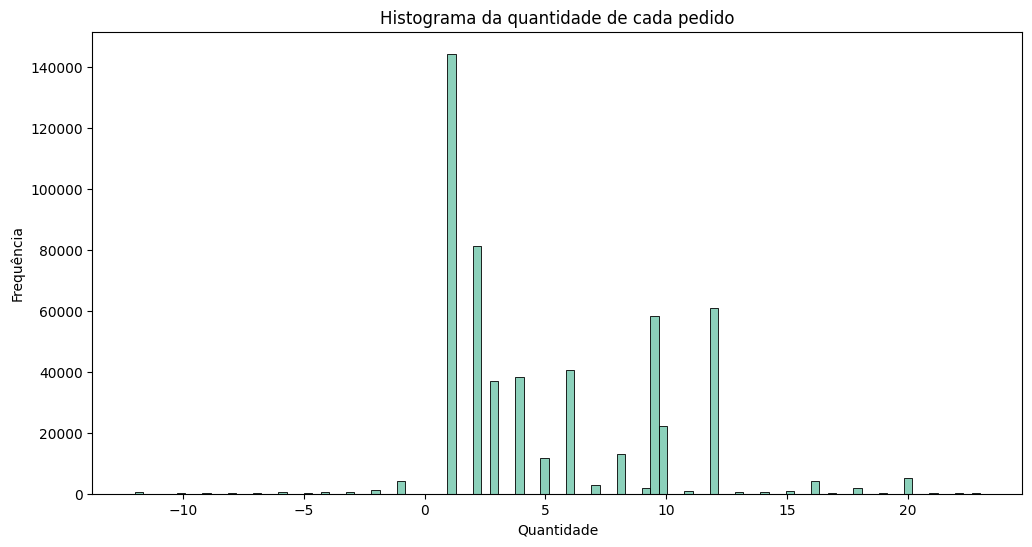

In [238]:
# Plotting a histogram of the quantity distribution
plt.figure(figsize=[12,6])
sns.histplot(df_seg['quantity'], bins=100, color=my_palette[0])
plt.title("Histograma da quantidade de cada pedido")
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.savefig(fname='hist_da_qtd.png')
plt.show()

In [239]:
# Generating summary statistics for the unit_price column
df_seg['unit_price'].describe()

count    536527.000000
mean          4.674876
std          94.866990
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64

In [240]:
# Calculating the Interquartile Range (IQR) for the unit_price column
Q1 = df_seg['unit_price'].quantile(0.25)
Q3 = df_seg['unit_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the upper and lower bounds for outlier detection
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Calculating the mean of the unit_price column
mediana = df_seg['unit_price'].mean()

# Replacing outlier prices with the median value
df_seg['unit_price'] = df_seg['unit_price'].apply(
    lambda x: mediana if x < limite_inferior or x > limite_superior else x
    )

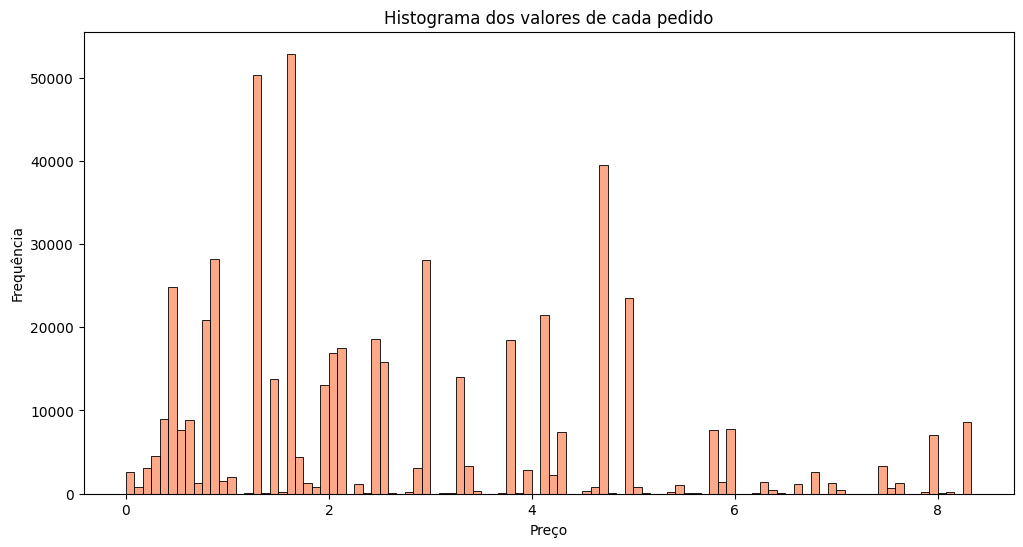

In [241]:
# Plotting a histogram of the unit price distribution
plt.figure(figsize=[12,6])
sns.histplot(df_seg['unit_price'], bins=100, color=my_palette[1])
plt.title("Histograma dos valores de cada pedido")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

Neste ponto, removemos os valores atípicos para quantidade pedida do produto, e do valor unitário. Para isso, foi utilizado o método do interquartil, que foi capaz de realizar uma boa limpeza dos outliers nos permitindo seguir com uma boa análise, como se pode observar nos histogramas gerados após a remoção desses dados.

#### Ajustando os tipos de dados

In [242]:
# Converting the invoice_date column to datetime type
df_seg['invoice_date'] = pd.to_datetime(df_seg['invoice_date'])

# Converting the customer_id column to integer type
df_seg['customer_id'] = df_seg['customer_id'].astype('int')

Converemos a coluna do identificador do usuário para o tipo inteiro, e a coluna de data para date time, o que auxiliará nas futuras análises.

### Analisando os dados - EDA

Como o objetivo é agrupar/segmentar os usuários, serão analisadas brevemente a distribuição dos dados:  
- Valor total do pedido;  
- Valor total das vendas por mês;  
- Total de pedidos por mês e por dia da semana.

In [244]:
# Extracting the day and month from the invoice_date column
df_seg['invoice_day'] = df_seg['invoice_date'].dt.to_period("D")
df_seg['invoice_month'] = df_seg['invoice_date'].dt.to_period("M")

In [245]:
# Calculating total value for each row
df_seg['total'] = df_seg['quantity'] * df_seg['unit_price']

In [246]:
# Generating summary statistics for the total column
df_seg['total'].describe()

count    536527.000000
mean         10.604111
std          11.709334
min         -97.800000
25%           3.360000
50%           7.380000
75%          15.000000
max         191.590000
Name: total, dtype: float64

Text(0, 0.5, 'Valor total do pedido')

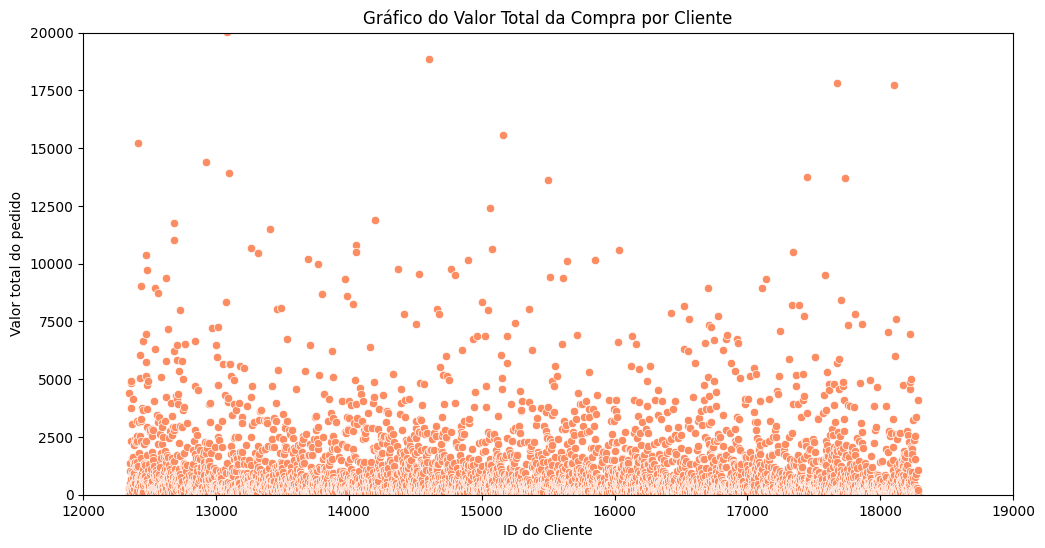

In [247]:
# Creating a scatter plot of total sales per customer
plt.figure(figsize=[12,6])
sns.scatterplot(data=df_seg.groupby(
    ['customer_id'], as_index=False)['total']
    .sum(), 
    x='customer_id', 
    y='total', 
    color= my_palette[1]
    )
plt.xlim([12000,19000])
plt.ylim([0,20000])
plt.title("Gráfico do Valor Total da Compra por Cliente")
plt.xlabel("ID do Cliente")
plt.ylabel("Valor total do pedido")

Text(0.5, 1.0, 'Total das vendas por mês')

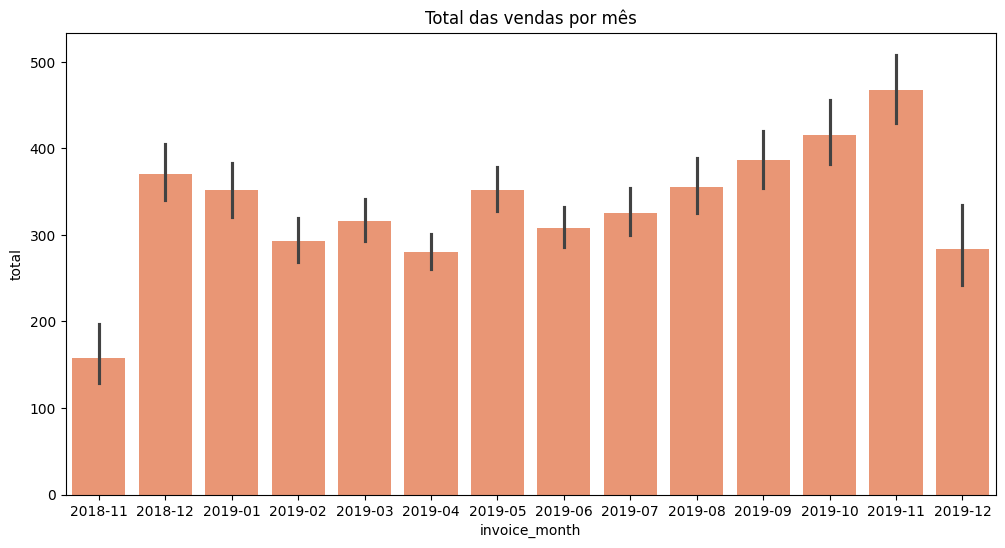

In [248]:
# Aggregating total sales by customer and invoice month
customer_puchase = df_seg.groupby(['invoice_month','customer_id'], as_index=False)['total'].sum()

# Plotting the total sales by month
plt.figure(figsize=[12,6])
sns.barplot(data=customer_puchase, x='invoice_month', y='total', color=my_palette[1])
plt.title("Total das vendas por mês")

Text(0, 0.5, 'Número de Pedidos')

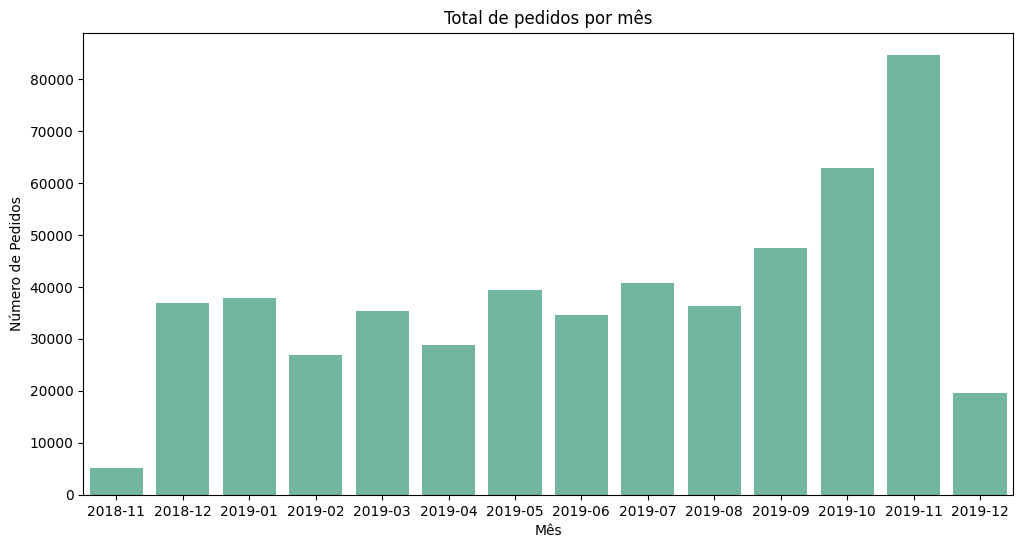

In [249]:
# Plotting the number of orders by month
plt.figure(figsize=[12,6])
sns.barplot(data=df_seg.groupby(['invoice_month'],as_index=False)['invoice_no'].count(), 
            x='invoice_month', 
            y='invoice_no', 
            color=my_palette[0])
plt.title("Total de pedidos por mês")
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')

Text(0, 0.5, 'Número do Pedido')

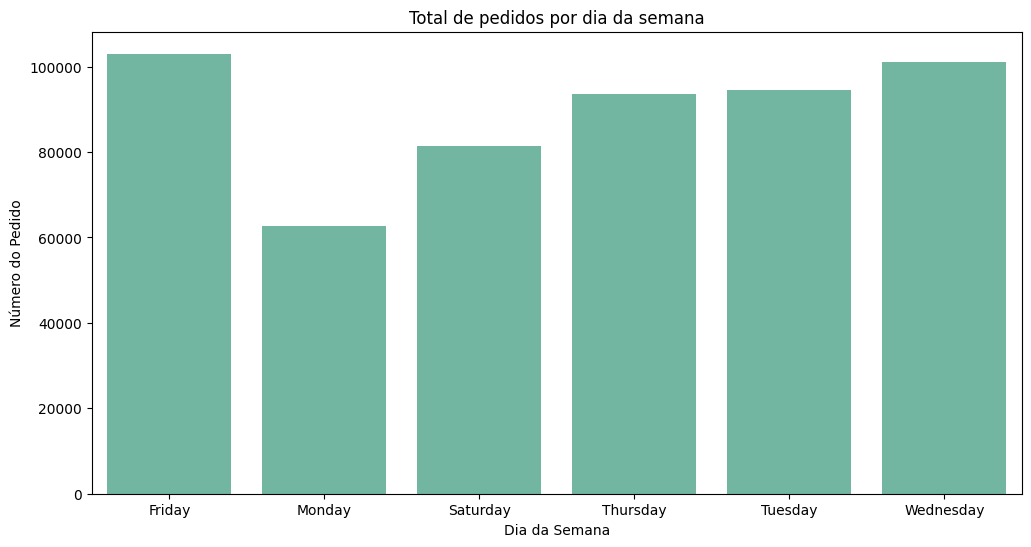

In [250]:
# Adding a column with the day of the week for each invoice date
df_seg['invoice_dow'] = df_seg['invoice_date'].dt.day_name()

# Plotting the number of orders by day of wek
plt.figure(figsize=[12,6])
sns.barplot(data=df_seg.groupby(['invoice_dow'],as_index=False)['invoice_no'].count(), 
            x='invoice_dow', 
            y='invoice_no', 
            color=my_palette[0])
plt.title("Total de pedidos por dia da semana")
plt.xlabel('Dia da Semana')
plt.ylabel('Número do Pedido')

Plotamos alguns gráficos acima para poder visualizar melhor os dados:  

Vemos que há uma certa sazonalidade nas vendas da empresa uma vez que há dois picos no valor total das vendas por mês e na quantidade de pedidos, um pico maior no final do ano, e outro um pouco menor no meio do ano, indicando que esses perídos são mais fortes para vendas. Também vemo que os dias preferidos de compra são nas sextas e quartas-feiras.

### Segmentação dos clientes

A seguir, vamos utilizar a chamada análise RFM para segmentar os clientes. A análise RFM é uma estratégia de marketing amplamente utilizada que estima o valor de cada cliente com base em três varáveis: Recência (quão recentemente um cliente fez uma compra), Frequência (com que frequência ele compra) e Valor monetário (quanto dinheiro ele gasta em compras).

Primeiro, vamos calcular cada tópico para cada um dos clientes, e depois realizar a segmentação deles.

##### Recência

In [251]:
# Setting the most recent invoice date as 'reference_date'
reference_date = df_seg['invoice_date'].max()

# Calculating the recency for each customer
recency = df_seg.groupby('customer_id')['invoice_date'].max().apply(lambda x: (reference_date - x).days)

##### Frequência

In [252]:
# Calculating the frequency for each customer
frequency = df_seg.groupby('customer_id')['invoice_date'].nunique()

##### Valor Monetário

In [253]:
# Calculating the monetary for each customer
monetary = df_seg.groupby('customer_id')['total'].sum()

##### Combinação das scores

In [254]:
# Creating a dataframe for RFM analisys
df_RMF = pd.DataFrame()
df_RMF['recency'] = recency
df_RMF['frequency'] = frequency
df_RMF['monetary'] = monetary
df_RMF = df_RMF.reset_index()

# Displaying the summary of the DataFrame
df_RMF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  4373 non-null   int32  
 1   recency      4373 non-null   int64  
 2   frequency    4373 non-null   int64  
 3   monetary     4373 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 119.7 KB


#### Padronizando os dados

In [255]:
# Standardizing RFM data by quantile and creating RFM scores
df_RMF['R'] = pd.qcut(df_RMF['recency'].rank(method='first'), 5, labels=[5,4,3,2,1])
df_RMF['F'] = pd.qcut(df_RMF['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
df_RMF['M'] = pd.qcut(df_RMF['monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])
df_RMF['RFM_score'] = df_RMF['R'].astype(str) + df_RMF['F'].astype(str) + df_RMF['M'].astype(str)
df_RMF

,customer_id,recency,frequency,monetary,R,F,M,RFM_score
0,12346,325,2,20.017463,1,1,1,111
1,12347,1,49,4387.254811,5,5,5,555
2,12348,74,14,300.435416,2,4,2,242
3,12349,13,7,1325.307025,4,2,4,424
4,12350,283,37,509.955089,1,5,3,153
...,...,...,...,...,...,...,...,...
4368,18281,180,1,56.269752,1,1,1,111
4369,18282,6,9,206.449903,5,3,2,532
4370,18283,0,93,4102.217138,5,5,5,555
4371,18287,42,24,1074.009553,3,4,4,344


### Criando o Modelo de Clusterização

In [256]:
# Importing libralies for clustering analysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

##### Escalonando e Ajustando os dados

Para ajustar as características, optamos por utilizar o Escalonamento Min-Max pois não temos outliers nesses dados que serão ajustados e vamos preservar as proporções de cada tópico da análise RFM.

In [257]:
# Creating an instance of MinMaxScaler for feature scaling
scaler = MinMaxScaler()
rfm_scaled = df_RMF[['R', 'F', 'M']]

# Normalizing data
rfm_scaled = scaler.fit_transform(rfm_scaled)

##### Definindo o número de Clusters

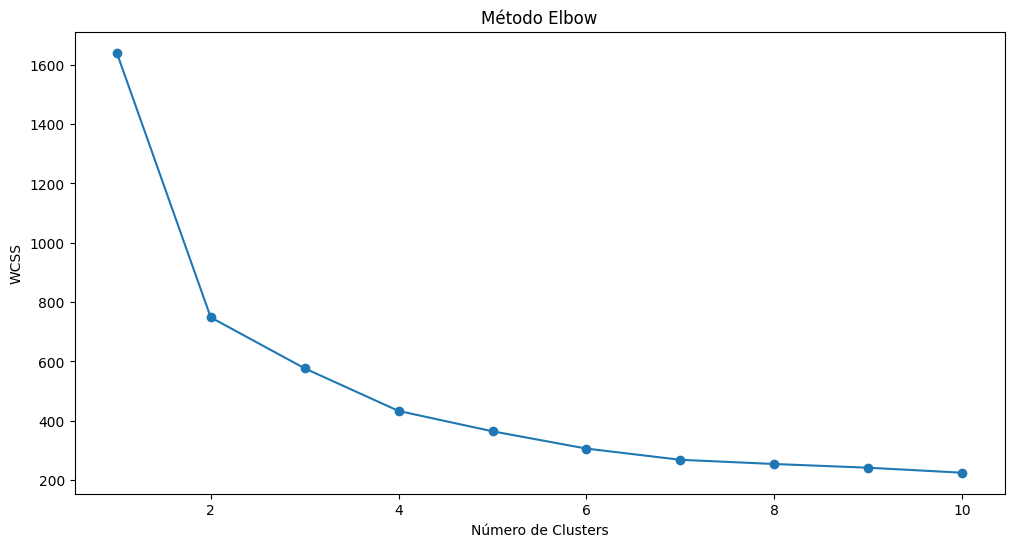

In [258]:
# Testing different numbers of clusters for KMeans clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS (Within-Cluster Sum of Squares) graph to determine the "elbow" point
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

Para decidir sobre o número de clusters, utilizamos o método do cotovelo (ou Método Elbow), no qual identificamos qual o número de clusters ótimo, no qual a adição de mais um cluster não melhora significativamente a variabilidade dos clusters.    

O "cotovelo" do gráfico é o ponto onde a taxa de diminuição da inércia começa a desacelerar significativamente. No caso acima, em 4 clusters.

##### Realizando a Clusterização

In [259]:
# Applying KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_RMF['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [260]:
# Converting categorical columns to numeric values
df_RMF['R'] = df_RMF['R'].astype(int)
df_RMF['F'] = df_RMF['F'].astype(int)
df_RMF['M'] = df_RMF['M'].astype(int)
df_RMF['RFM_score'] = df_RMF['RFM_score'].astype(int)

##### Visualizando as métricas

In [261]:
# Aggregating RFM metrics and size by cluster
cluster_analysis = df_RMF.groupby('Cluster').agg({
    'R': ['mean', 'median', 'std'],
    'F': ['mean', 'median', 'std'],
    'M': ['mean', 'median', 'std'],
    'customer_id': 'nunique'
}).reset_index()

# Renaming columns in the dataFrame
cluster_analysis.columns = ['Cluster', 
                            'R_mean', 
                            'R_median', 
                            'R_std', 
                            'F_mean', 
                            'F_median', 
                            'F_std', 
                            'M_mean', 
                            'M_median', 
                            'M_std', 
                            'Cluster_Size']

# Visualizing the dataframe
cluster_analysis

,Cluster,R_mean,R_median,R_std,F_mean,F_median,F_std,M_mean,M_median,M_std,Cluster_Size
0,0,3.683531,4.0,0.709357,1.860065,2.0,0.765507,1.977395,2.0,0.830796,929
1,1,2.334372,2.0,0.696242,3.869159,4.0,0.844152,3.883697,4.0,0.817540,963
2,2,1.393031,1.0,0.488622,1.811994,2.0,0.835342,1.700972,2.0,0.728662,1234
3,3,4.595028,5.0,0.491084,4.353649,5.0,0.747946,4.364876,5.0,0.739279,1247


Dividimos os usuários entre os clusters, agrupamos os clusters e geramos as principais métricas que vão nos auxiliar a avaliar os grupos futuramente.

### Análisando os clusters

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\1837338657.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(x=df_RMF['R'], y=df_RMF['F'], hue=df_RMF['Cluster'], palette=my_palette)


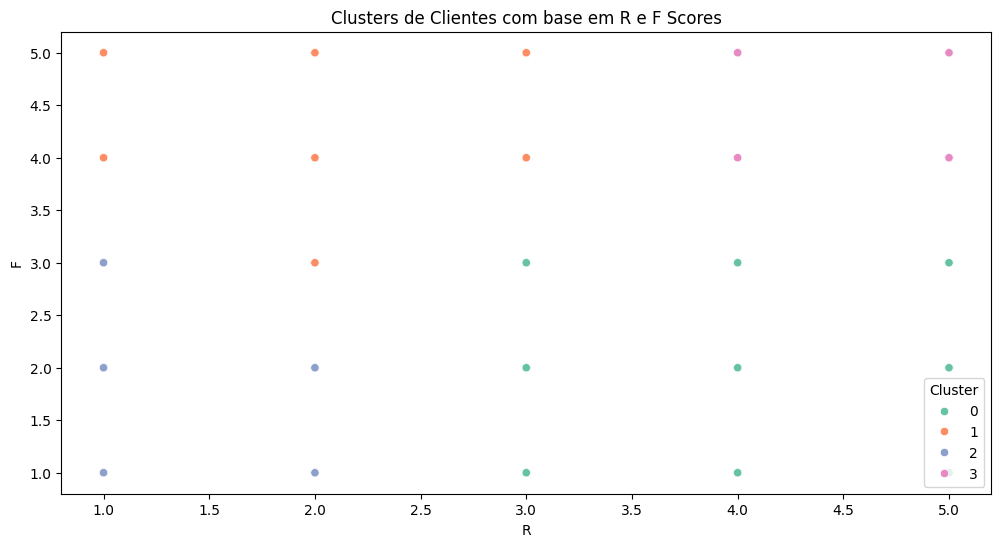

In [262]:
# Creating a scatter plot of R and F scores, colored by cluster
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_RMF['R'], y=df_RMF['F'], hue=df_RMF['Cluster'], palette=my_palette)
plt.title('Clusters de Clientes com base em R e F Scores')
plt.show()

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\1348304647.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Cluster', y='R', data=df_RMF, ax=axes[0], hue='Cluster', palette=my_palette, legend=False)
C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\1348304647.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Cluster', y='F', data=df_RMF, ax=axes[1], hue='Cluster', palette=my_palette, legend=False)
C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\1348304647.py:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Cluster', y='M', data=df_RMF, ax=axes[2], hue='Cluster', palette=my_palette, legend=False)


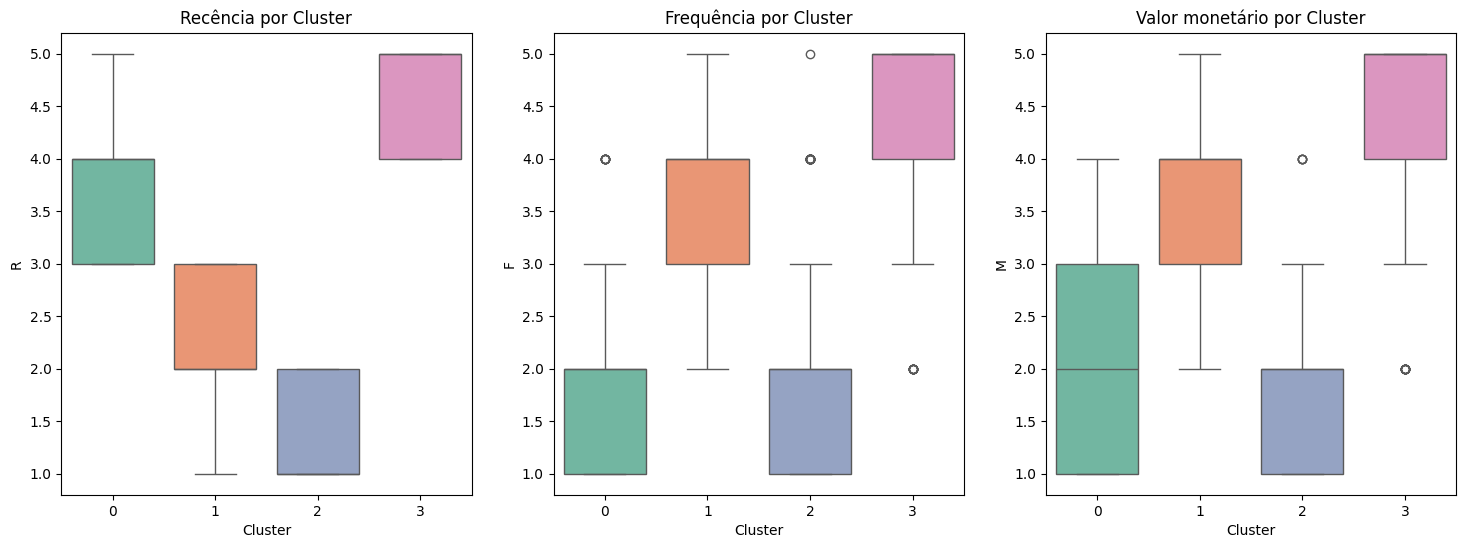

In [263]:
# Boxplot comparing Recency, Frequency, and Monetary values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Cluster', y='R', data=df_RMF, ax=axes[0], hue='Cluster', palette=my_palette, legend=False)
sns.boxplot(x='Cluster', y='F', data=df_RMF, ax=axes[1], hue='Cluster', palette=my_palette, legend=False)
sns.boxplot(x='Cluster', y='M', data=df_RMF, ax=axes[2], hue='Cluster', palette=my_palette, legend=False)
axes[0].set_title('Recência por Cluster')
axes[1].set_title('Frequência por Cluster')
axes[2].set_title('Valor monetário por Cluster')
plt.show()

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\83567736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Cluster_Size', data=cluster_analysis, palette=my_palette)
C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\83567736.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(x='Cluster', y='Cluster_Size', data=cluster_analysis, palette=my_palette)


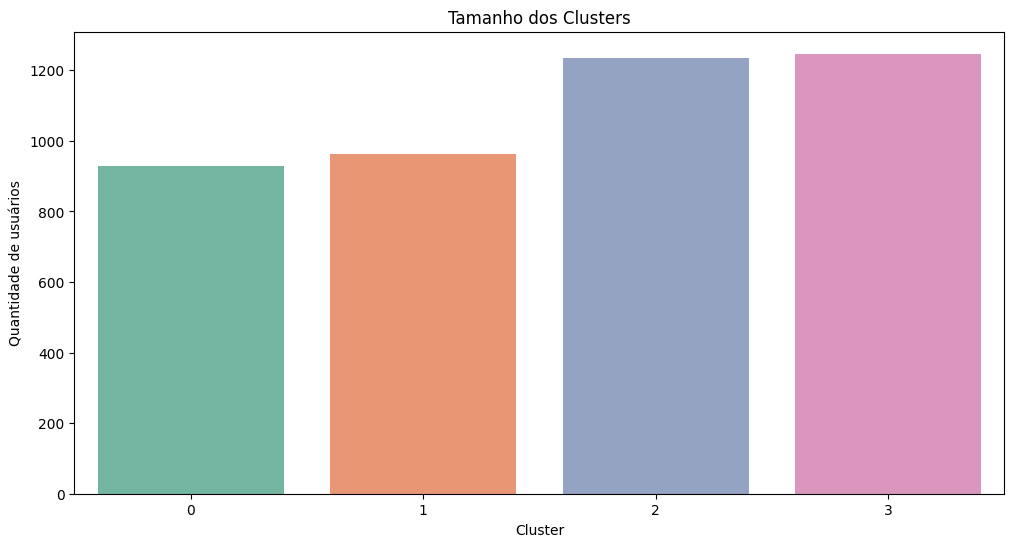

In [264]:
# Plotting a barplot to visualize cluster sizes
plt.figure(figsize=[12,6])
sns.barplot(x='Cluster', y='Cluster_Size', data=cluster_analysis, palette=my_palette)
plt.title('Tamanho dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de usuários')
plt.show()
plt.show()

In [265]:
# Merging the cluster assignments into the original DataFrame based on customer_id
df_seg = df_seg.merge(df_RMF[['customer_id','Cluster']], how='right', on='customer_id')

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\3259916085.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=customer_puchase, x='invoice_month', y='total', hue='Cluster', palette=my_palette)


Text(0.5, 1.0, 'Total das vendas por mês')

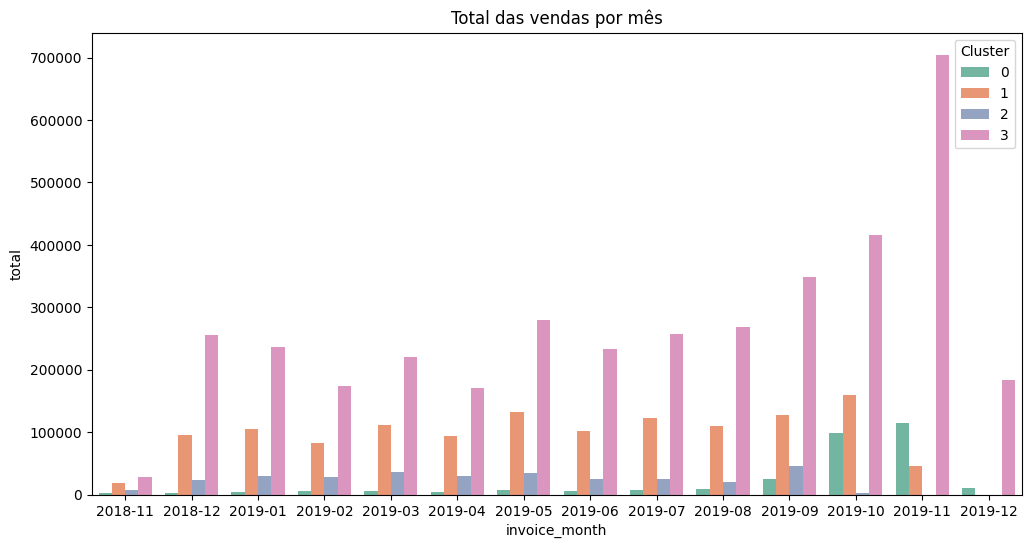

In [266]:
# Aggregating total sales by customer and invoice month
customer_puchase = df_seg.groupby(['invoice_month','Cluster'], as_index=False)['total'].sum()

# Plotting the total sales by month
plt.figure(figsize=[12,6])
sns.barplot(data=customer_puchase, x='invoice_month', y='total', hue='Cluster', palette=my_palette)
plt.title("Total das vendas por mês")

C:\Users\joaoq\AppData\Local\Temp\ipykernel_16224\3115404450.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=monthly_orders, x='invoice_month', y='invoice_no', hue='Cluster', palette=my_palette)


Text(0.5, 1.0, 'Total de pedidos por mês')

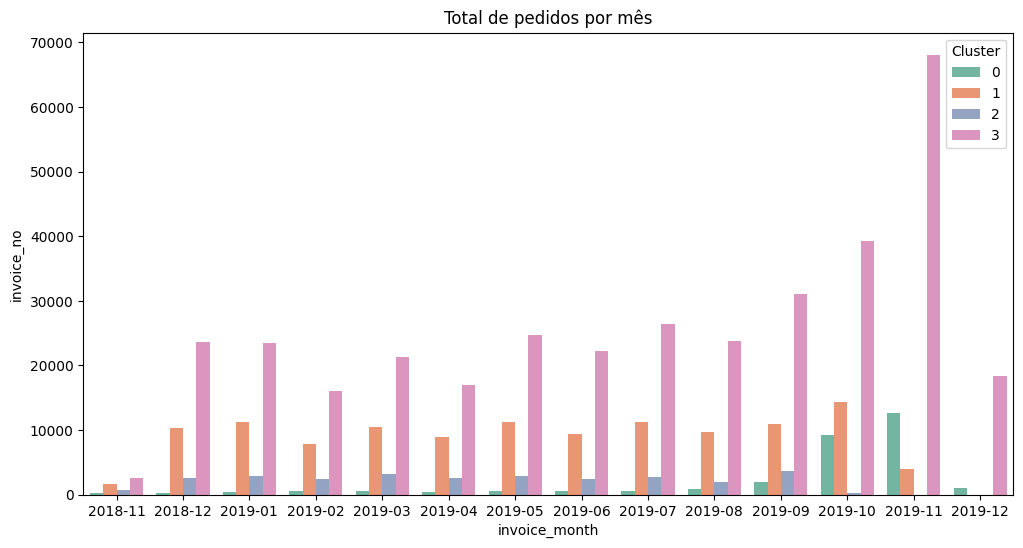

In [267]:
# Grouping the data by invoice month and cluster
monthly_orders = df_seg.groupby(['invoice_month', 'Cluster'])['invoice_no'].count().reset_index()

# Creating a bar plot of total orders per month
plt.figure(figsize=[12,6])
sns.barplot(data=monthly_orders, x='invoice_month', y='invoice_no', hue='Cluster', palette=my_palette)
plt.title("Total de pedidos por mês")

#### Interpretação dos Clusters

A partir das métricas visualizadas, os gráficos de caixa, e os gráficos de barras separados por clusters, ficou claro uma boa divisão entre todos os grupos de clientes, isso mostra um bom desempenho do nosso modelo de clusterização. O gráfico de caixa mostra muito bem cada cluster e suas características, isso vai ser destacado nos testes estatísticos que veremos a seguir.

Baseando-se na tabela de classificação da análise RFM, podemos classificar os clusters em:
- Cluster 3 - Clientes Fiéis: Compram recentemente. Compram com frequência. Gastam mais. 
- Cluster 0 - Promissor: Compradores recentes, mas não gastaram muito.
- Cluster 1 - Em risco:	Gastaram muito dinheiro e compraram com freqüência. Mas não tão recente.
- Cluster 2 - Hibernando: A última compra foi feita a algum tempo. Pouco gasto e baixo número de pedidos.

### Formulando testes de hipóteses
- Teste 1: Testar a hipótese de que há diferença significativa no valor monetário das compras entre os grupos; 

- Teste 2: Testar a hipótese de que há diferença significativa na frequência de compra dos grupos;

- Teste 3: Testar a hipótese de que há diferença significativa na recencia entre os grupos.

In [268]:
# Importing libralies for for normality, Kruskal-Wallis, and post-hoc analysis
from scipy.stats import shapiro
from scipy.stats import kruskal
import statsmodels.stats.multicomp as mc

#### Teste 1 - Testando a hipótese de que há diferença significativa no valor monetário das compras entre os grupos

##### Identificando se a distribuição é normal ou não, para decidir o tipo de teste estatístico será utilizado

Aqui, vamos aplicar um teste estatístico que mede a normalidade dos dados, o teste escolhido foi o teste Shapiro-Wilk, pois é o mais utilizado e com maior poder estatístico.

In [269]:
# Creating function to perform Shapiro-Wilk normality test
def shap_test(col, alpha=0.05):
    for cluster in df_RMF['Cluster'].unique():
        stat, p = shapiro(df_RMF[df_RMF['Cluster'] == cluster][col])
        print(f'Cluster {cluster}: p-value = {p}')

        if p < alpha:
            print('A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.')
            print()
        else:
            print('A hipótese nula de que a distribuição dos dados é uma distribuição normal não pode ser rejeitada.')
            print()

- Hipótese Nula (H0): A distribuição dos dados segue uma distribuição normal.  
- Hipótese Alternativa (H1): A distribuição dos dados não segue uma distribuição normal.  
- alpha 0.05

In [270]:
# Performing Shapiro-Wilk normality test
shap_test('monetary')

Cluster 2: p-value = 1.4376721401406053e-19
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 3: p-value = 1.8753815266651188e-54
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 1: p-value = 1.981293826212355e-34
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 0: p-value = 7.319606685144611e-19
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.



A distribuição dos dados não é normal, será adotado o teste Kruskal-Wallis, que é a alternativa não paramética do teste ANOVA, e que quando é significante indica que ao menos uma amostra domina estocasticamente uma outra amostra.

In [271]:
# Function to perform Kruskal-Wallis test
def kruskal_test(col,alpha=0.05):
    kruskal_results = kruskal(*[df_RMF[df_RMF['Cluster'] == cluster][col] for cluster in df_RMF['Cluster'].unique()])
    print(f'Kruskal-Wallis p-value = {kruskal_results.pvalue}')

    if kruskal_results.pvalue < alpha:
        print('A hipótese nula de que não há diferença estatística entre as amostras é rejeitada.')
        print()
    else:
        print('A hipótese nula de que não há diferença estatística entre as amostras não pode ser rejeitada.')
        print()

- Hipótese Nula (H0): Não há diferença estatística entre as amostras.  
- Hipótese Alternativa (H1): Pelo menos uma das amostras é estatisticamente diferente das outras.  
- alpha 0.05

In [272]:
# Performing Kruskal-Wallis test
kruskal_test('monetary')

Kruskal-Wallis p-value = 0.0
A hipótese nula de que não há diferença estatística entre as amostras é rejeitada.



Uma vez que há diferença entre as amostras, vamos realizar a análise Pós HOC para identificar quais grupos são significativamente diferentes entre si. Utilizaremos o teste de Tukey, pois nele conseguimos visualizar a comparação entre todos os grupos.

Aplicamos o teste teste de Tukey HSD apenas após o teste Kruskal-Wallis pois ao realizar um único teste inicial para ver se há diferenças gerais, minimizamos o número total de testes que precisam ser realizados, o que ajuda a controlar erros do tipo I (falsos positivos).

In [273]:
# Tukey HSD (após ANOVA)
tukey = mc.MultiComparison(df_RMF['monetary'], df_RMF['Cluster'])
tukey_results = tukey.tukeyhsd()
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     0      1  1028.5882    0.0   690.7766 1366.3998   True
     0      2   -76.7272 0.9264  -395.8059  242.3516  False
     0      3  2699.0244    0.0  2380.6608 3017.3879   True
     1      2 -1105.3154    0.0 -1421.1642 -789.4665   True
     1      3  1670.4362    0.0  1355.3098 1985.5626   True
     2      3  2775.7515    0.0  2480.7953 3070.7078   True
-----------------------------------------------------------


A tabela acima resume bem os resultados do teste de Tukey, em relação ao valor monetário das compras entre os grupos. Podemos observar a diferença média entre os dois grupos comparados na coluna meandiff, o p-valor de cada teste na coluna p-adj, o intervalor de confiança nas colunas lower e upper, e por fim, o resultado do teste.

No caso do valor monetário, fica claro na tabela que a diferença entre as médias não é significativa apenas na comparação dos Clusters 0 (Clientes Promissores) 2 (CLientes Hibernando), enquanto que em todas as outras combinações, as médias são estatisticamente diferentes.

#### Teste 2: Testando a hipótese de que há diferença significativa na frequência de compra dos grupos

##### Aplicando o teste Shapiro-Wilk

- Hipótese Nula (H0): A distribuição dos dados segue uma distribuição normal.  
- Hipótese Alternativa (H1): A distribuição dos dados não segue uma distribuição normal.  
- alpha 0.05

In [274]:
# Performing Shapiro-Wilk normality test
shap_test('frequency')

Cluster 2: p-value = 4.084867588049476e-31
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 3: p-value = 5.009542902577941e-52
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 1: p-value = 4.20772632636994e-35
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 0: p-value = 5.318872286068528e-22
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.



##### Aplicando o teste Kruskal-Wallis

- Hipótese Nula (H0): Não há diferença estatística entre as amostras.  
- Hipótese Alternativa (H1): Pelo menos uma das amostras é estatisticamente diferente das outras.  
- alpha 0.05

In [275]:
# Performing Kruskal-Wallis test
kruskal_test('frequency')

Kruskal-Wallis p-value = 0.0
A hipótese nula de que não há diferença estatística entre as amostras é rejeitada.



##### Realizando a análise Pós HOC para identificar quais grupos são significativamente diferentes entre si

In [276]:
# Tukey HSD (após ANOVA)
tukey = mc.MultiComparison(df_RMF['frequency'], df_RMF['Cluster'])
tukey_results = tukey.tukeyhsd()
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   17.383    0.0  13.3074 21.4586   True
     0      2  -0.1576 0.9996  -4.0072   3.692  False
     0      3  39.5622    0.0  35.7212 43.4031   True
     1      2 -17.5406    0.0 -21.3512  -13.73   True
     1      3  22.1792    0.0  18.3773 25.9811   True
     2      3  39.7198    0.0  36.1612 43.2784   True
-----------------------------------------------------


Novamente tivemos resultados do teste de Tukey retornando uma diferença estatisticamente significativa em todas as combinações de clusters, com exceção apenas entre os clusters 0 e 2, para os dados das médias de frequência de compras dos usuários de cada cluster.

#### Teste 3: Testando a hipótese de que há diferença significativa na recência entre os grupos

##### Aplicando o teste de normalidade: Shapiro-Wilk

- Hipótese Nula (H0): A distribuição dos dados segue uma distribuição normal.  
- Hipótese Alternativa (H1): A distribuição dos dados não segue uma distribuição normal.  
- alpha 0.05

In [277]:
# Performing Shapiro-Wilk normality test
shap_test('recency')

Cluster 2: p-value = 4.55955895772183e-20
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 3: p-value = 2.9981078808151415e-31
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 1: p-value = 4.251146815626926e-32
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.

Cluster 0: p-value = 5.3704903757942396e-18
A hipótese nula de que a distribuição dos dados é uma distribuição normal pode ser rejeitada.



As amostras de dados da recência dos usuários não são distribuídas de forma normal, vamos prosseguir com o teste não paramético.

##### Aplicando o teste Kruskal-Wallis

- Hipótese Nula (H0): Não há diferença estatística entre as amostras.  
- Hipótese Alternativa (H1): Pelo menos uma das amostras é estatisticamente diferente das outras.  
- alpha 0.05

In [278]:
# Performing Kruskal-Wallis test
kruskal_test('recency')

Kruskal-Wallis p-value = 0.0
A hipótese nula de que não há diferença estatística entre as amostras é rejeitada.



##### Realizando a análise Pós HOC para identificar quais grupos são significativamente diferentes entre si

In [279]:
# Tukey HSD (após ANOVA)
tukey = mc.MultiComparison(df_RMF['recency'], df_RMF['Cluster'])
tukey_results = tukey.tukeyhsd()
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1   63.8992   0.0    56.953   70.8454   True
     0      2  171.5809   0.0  165.0199  178.1419   True
     0      3   -20.285   0.0  -26.8313  -13.7387   True
     1      2  107.6817   0.0  101.1871  114.1763   True
     1      3  -84.1842   0.0  -90.6639  -77.7045   True
     2      3 -191.8659   0.0 -197.9309 -185.8009   True
--------------------------------------------------------


Por fim, visualizamos todas as combinações dos clusters em relação a recência de compras. Podemos observar que todos os p-valores foram inferiores ao nível de significância de 0,05, o que indica que todas as amostras são estatísticamente diferentes umas das outras em relação a este tópico da análise.

### Conclusões Finais do Projeto

##### Vendas da Everything Plus  
Vimos que as vendas da empresa se concentram principalmente no final do ano, principalmente nos meses de outubro, novembro e dezembro.  

##### Segmentação dos clientes  
Utilizamos a Análise RFM para segmentar os clientes com base na Recência (tempo passado desde a última compra), Frequência (frequência em que os usuários realizam a compra) e Monetariedade (valor das compras realizadas pelo cliente). Após calculadas os dados por cada cliente, padronizamos as métricas e aplicamos um modelo de Machine Learning para identificar o número ótimo de clusters, que foi decidida em 4, e realizar a segmentação de todos os clientes. Com os grupos definidos, fomos capazes de gerar métricas (média, mediana e desvio padrão) para cada critério e geramos gráficos que nos permitiram classificar os clientes nos seguintes grupos:  
- Cluster 3 - Clientes Fiéis: Compram recentemente. Compram com frequência. Gastam mais. 
- Cluster 0 - Promissor: Compradores recentes, mas não gastaram muito.
- Cluster 1 - Em risco:	Gastaram muito dinheiro e compraram com freqüência. Mas há muito tempo.
- Cluster 2 - Hibernando: A última compra foi feita a algum tempo. Pouco gasto e baixo número de pedidos.  
  
##### Testes estatísticos para comprovar as diferenças entre os clusters  
Aqui foram realizados três testes para comprovar a diferença estatística entre os três critérios da análise RFM (recência, frequência e monetariedade).  
Primeiro, aplicamos um teste de normalidade para definir se iríamos utilizar, ou não, um teste paramético, depois realizamos o teste estatístico e depois a análise pós HOC para identificar exatamente quais grupos diferiam entre si.  

O resultado final foi muito semelhante ao que já havíamos visualizado anteriormente no gráfico de caixa por cluster: houve uma diferença estatisticamente significativa em todas as combinações de clusters no critério de recência, enquanto que na frequência e monetariedade houve diferença significativa em todos os clusters com exceção apenas entre os clusters 0 (cliente promissor) e 2 (cliente hibernando).

##### Recomendações à equipe de marketing  
A partir dos resultados, é possível identificar que a equipe de marketing deve seguir as seguintes estratégias:
- Clientes Fiéis: Esses são os clientes mais valiosos da empresa, devemos investir pra que fidelizemos eles de forma que se sintam mais dispostos a manter uma relação próxima da empresa, e continuem comprando com frequência e altos valores.
- Clientes Promissores: Investir em campanhas de marketing que induzam os clientes a continuar comprando, e ao mesmo tempo, passar a gastar mais por compra, até que eles se tornem Clientes Fiéis.
- Clientes Em risco: Realizar pesquisas para identificar o motivo pelo qual esses clientes pararam de comprar e enviar campanhas personalizadas para reavivar o interesse do clientes em comprar com a empresa.
- Clientes Hibernando: Investir em esforços de marketing para lembrá-los de que já faz um tempo desde a última transação, oferecendo-lhes um incentivo para reavivar os seus investimentos e voltarem a ser clientes recentes.

In [281]:
df_seg.to_csv('seg.csv')